## Data Preprocessing

In [19]:
import pandas as pd

In [2]:
dfnoaa = pd.read_csv('DATA/NOAA.csv')

/tmp/ipykernel_172262/234392770.py:1: DtypeWarning: Columns (2,7,8,9,11,12,13,14,15,16,23,28,30,31,32,33,35,36,38,40,48,49,50,51,56,58,59) have mixed types. Specify dtype option on import or set low_memory=False.
  dfnoaa = pd.read_csv('DATA/NOAA.csv')


In [16]:
dfnoaa.columns.to_list()

['STATION', 'DATE', 'WND', 'Wind_X', 'Wind_Y', 'Wind_Z']

In [4]:
columnstodrop = ['AA1',
 'AA2',
 'AE1',
 'AG1',
 'AJ1',
 'AL1',
 'AL2',
 'AT1',
 'AT2',
 'AT3',
 'AT4',
 'AT5',
 'AY1',
 'AY2','CALL_SIGN.1',
 'CIG',
 'DEW',
 'ED1',
 'EQD',
 'GA1',
 'GA2',
 'GA3',
 'GA4',
 'GA5',
 'GD1',
 'GD2',
 'GD3',
 'GD4',
 'GF1',
 'GG1',
 'GG2',
 'IA1',
 'IA2',
 'KA1',
 'KA2',
 'MA1',
 'MD1',
 'ME1',
 'MW1',
 'MW2',
 'MW3',
 'MW4',
 'OA1',
 'OC1',
 'OE1',
 'OE2',
 'QUALITY_CONTROL.1',
 'REM',
 'REPORT_TYPE.1',
 'SLP',
 'SOURCE.1',
 'TMP',
 'UA1',
 'UG1',
 'VIS','REPORT_TYPE',
 'CALL_SIGN',
 'QUALITY_CONTROL']

In [5]:
dfnoaa.drop(columns = columnstodrop,inplace=True)

In [8]:
dfnoaa.drop(columns='SOURCE',inplace=True)

In [11]:
dfnoaa['DATE'] = pd.to_datetime(dfnoaa['DATE'])

In [15]:
dfnoaa

,STATION,DATE,WND,Wind_X,Wind_Y,Wind_Z
0,16344599999,2005-01-01 00:00:00,"080,1,N,0062,1",61.058081,10.766187,0.0
1,16344599999,2005-01-01 01:00:00,"070,1,N,0067,1",62.959406,22.915350,0.0
2,16344599999,2005-01-01 02:00:00,"060,1,N,0062,1",53.693575,31.000000,0.0
3,16344599999,2005-01-01 02:55:00,"080,1,N,0051,1",50.225195,8.856057,0.0
4,16344599999,2005-01-01 03:00:00,"080,1,N,0051,1",50.225195,8.856057,0.0
...,...,...,...,...,...,...
156061,16061099999,2004-12-31 20:55:00,"999,9,C,0000,1",-0.000000,0.000000,0.0
156062,16061099999,2004-12-31 21:00:00,"999,9,C,0000,1",-0.000000,0.000000,0.0
156063,16061099999,2004-12-31 22:00:00,"999,9,C,0000,1",-0.000000,0.000000,0.0
156064,16061099999,2004-12-31 23:00:00,"999,9,C,0000,1",-0.000000,0.000000,0.0


In [13]:
def parse_wind(wind_str):
    parts = wind_str.split(',')
    if len(parts) >= 4:  # Ensuring we have enough data
        direction_degrees = int(parts[0])
        speed = int(parts[3])
        direction_radians = math.radians(direction_degrees)  # Convert degrees to radians
        
        # Decompose the speed into x and y components
        wind_x = speed * math.sin(direction_radians)
        wind_y = speed * math.cos(direction_radians)
        wind_z = 0  # Constant z-component if vertical speed is not provided
    else:
        wind_x, wind_y, wind_z = 0, 0, 0  # Default values in case of error
    return wind_x, wind_y, wind_z

In [14]:
import math

dfnoaa[['Wind_X', 'Wind_Y', 'Wind_Z']] = dfnoaa['WND'].apply(lambda x: pd.Series(parse_wind(x)))

In [20]:
dflocations = pd.read_csv('DATA/station_location.csv')

In [21]:
dflocations

,STATION,LATITUDE,LONGITUDE,ELEVATION,NAME
0,16219099999,42.466667,12.983333,1875.00,"TERMINILLO MOUNTAIN, IT"
1,16320099999,40.657633,17.947033,14.32,"CASALE, IT"
2,16300099999,40.633333,15.800000,843.00,"POTENZA, IT"
3,16088099999,45.432167,10.267667,101.49,"GHEDI, IT"
4,16252099999,41.566667,14.650000,807.00,"CAMPOBASSO, IT"
5,16459099999,37.400000,14.917000,22.00,"CATANIA SIGONELLA, IT"
6,16179099999,43.516667,12.733333,574.00,"FRONTONE, IT"
7,16191099999,43.616342,13.362319,14.93,"FALCONARA, IT"
8,16084099999,44.913055,9.723333,138.98,"PIACENZA, IT"
9,16263099999,41.050000,15.233333,1093.00,"TREVICO, IT"


In [22]:
dfnoaa

,STATION,DATE,WND,Wind_X,Wind_Y,Wind_Z
0,16344599999,2005-01-01 00:00:00,"080,1,N,0062,1",61.058081,10.766187,0.0
1,16344599999,2005-01-01 01:00:00,"070,1,N,0067,1",62.959406,22.915350,0.0
2,16344599999,2005-01-01 02:00:00,"060,1,N,0062,1",53.693575,31.000000,0.0
3,16344599999,2005-01-01 02:55:00,"080,1,N,0051,1",50.225195,8.856057,0.0
4,16344599999,2005-01-01 03:00:00,"080,1,N,0051,1",50.225195,8.856057,0.0
...,...,...,...,...,...,...
156061,16061099999,2004-12-31 20:55:00,"999,9,C,0000,1",-0.000000,0.000000,0.0
156062,16061099999,2004-12-31 21:00:00,"999,9,C,0000,1",-0.000000,0.000000,0.0
156063,16061099999,2004-12-31 22:00:00,"999,9,C,0000,1",-0.000000,0.000000,0.0
156064,16061099999,2004-12-31 23:00:00,"999,9,C,0000,1",-0.000000,0.000000,0.0


In [23]:
df_noaa = pd.merge(dfnoaa,dflocations,on='STATION', how='left')

In [25]:
df_noaa.to_csv('NOAA.csv')

In [26]:
df_noaa

,STATION,DATE,WND,Wind_X,Wind_Y,Wind_Z,LATITUDE,LONGITUDE,ELEVATION,NAME
0,16344599999,2005-01-01 00:00:00,"080,1,N,0062,1",61.058081,10.766187,0.0,39.333333,16.400000,1720.0,"SCURO MOUNTAIN, IT"
1,16344599999,2005-01-01 01:00:00,"070,1,N,0067,1",62.959406,22.915350,0.0,39.333333,16.400000,1720.0,"SCURO MOUNTAIN, IT"
2,16344599999,2005-01-01 02:00:00,"060,1,N,0062,1",53.693575,31.000000,0.0,39.333333,16.400000,1720.0,"SCURO MOUNTAIN, IT"
3,16344599999,2005-01-01 02:55:00,"080,1,N,0051,1",50.225195,8.856057,0.0,39.333333,16.400000,1720.0,"SCURO MOUNTAIN, IT"
4,16344599999,2005-01-01 03:00:00,"080,1,N,0051,1",50.225195,8.856057,0.0,39.333333,16.400000,1720.0,"SCURO MOUNTAIN, IT"
...,...,...,...,...,...,...,...,...,...,...
156061,16061099999,2004-12-31 20:55:00,"999,9,C,0000,1",-0.000000,0.000000,0.0,45.033333,7.733333,710.0,"TORINO BRIC CROCE, IT"
156062,16061099999,2004-12-31 21:00:00,"999,9,C,0000,1",-0.000000,0.000000,0.0,45.033333,7.733333,710.0,"TORINO BRIC CROCE, IT"
156063,16061099999,2004-12-31 22:00:00,"999,9,C,0000,1",-0.000000,0.000000,0.0,45.033333,7.733333,710.0,"TORINO BRIC CROCE, IT"
156064,16061099999,2004-12-31 23:00:00,"999,9,C,0000,1",-0.000000,0.000000,0.0,45.033333,7.733333,710.0,"TORINO BRIC CROCE, IT"


In [27]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd 
# fetch dataset 
air_quality = fetch_ucirepo(id=360) 
  
# data (as pandas dataframes) 
X = air_quality.data.features 
y = air_quality.data.targets 
  
# metadata 
print(air_quality.metadata) 
  
# variable information 
print(air_quality.variables) 


{'uci_id': 360, 'name': 'Air Quality', 'repository_url': 'https://archive.ics.uci.edu/dataset/360/air+quality', 'data_url': 'https://archive.ics.uci.edu/static/public/360/data.csv', 'abstract': 'Contains the responses of a gas multisensor device deployed on the field in an Italian city. Hourly responses averages are recorded along with gas concentrations references from a certified analyzer. ', 'area': 'Computer Science', 'tasks': ['Regression'], 'characteristics': ['Multivariate', 'Time-Series'], 'num_instances': 9358, 'num_features': 15, 'feature_types': ['Real'], 'demographics': [], 'target_col': None, 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2008, 'last_updated': 'Sun Mar 10 2024', 'dataset_doi': '10.24432/C59K5F', 'creators': ['Saverio Vito'], 'intro_paper': {'title': 'On field calibration of an electronic nose for benzene estimation in an urban pollution monitoring scenario', 'authors': 'S. D. Vito, E. Massera, M. P

In [28]:
aq=X

In [31]:
aq

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,DateTime
0,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578,2004-03-10 18:00:00
1,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255,2004-03-10 19:00:00
2,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502,2004-03-10 20:00:00
3,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867,2004-03-10 21:00:00
4,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888,2004-03-10 22:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,3.1,1314,-200,13.5,1101,472,539,190,1374,1729,21.9,29.3,0.7568,2005-04-04 10:00:00
9353,2.4,1163,-200,11.4,1027,353,604,179,1264,1269,24.3,23.7,0.7119,2005-04-04 11:00:00
9354,2.4,1142,-200,12.4,1063,293,603,175,1241,1092,26.9,18.3,0.6406,2005-04-04 12:00:00
9355,2.1,1003,-200,9.5,961,235,702,156,1041,770,28.3,13.5,0.5139,2005-04-04 13:00:00


In [30]:
# Combine 'Date' and 'Time' columns into a single datetime column
aq['DateTime'] = pd.to_datetime(aq['Date'] + ' ' + aq['Time'])

# Drop the original 'Date' and 'Time' columns if needed
aq = aq.drop(columns=['Date', 'Time'])


In [32]:
aq.drop(columns=['PT08.S1(CO)','NMHC(GT)','C6H6(GT)','PT08.S2(NMHC)','NOx(GT)','PT08.S3(NOx)','NO2(GT)','PT08.S4(NO2)','PT08.S5(O3)','RH','AH'],inplace=True)

In [37]:
aq

,CO(GT),T,DateTime,DATE
0,2.6,13.6,2004-03-10 18:00:00,2004-03-10 18:00:00
1,2.0,13.3,2004-03-10 19:00:00,2004-03-10 19:00:00
2,2.2,11.9,2004-03-10 20:00:00,2004-03-10 20:00:00
3,2.2,11.0,2004-03-10 21:00:00,2004-03-10 21:00:00
4,1.6,11.2,2004-03-10 22:00:00,2004-03-10 22:00:00
...,...,...,...,...
9352,3.1,21.9,2005-04-04 10:00:00,2005-04-04 10:00:00
9353,2.4,24.3,2005-04-04 11:00:00,2005-04-04 11:00:00
9354,2.4,26.9,2005-04-04 12:00:00,2005-04-04 12:00:00
9355,2.1,28.3,2005-04-04 13:00:00,2005-04-04 13:00:00


In [46]:
aq.drop(columns=['DateTime'],inplace=True)

In [47]:
aq

,CO(GT),T,DATE
0,2.6,13.6,2004-03-10 18:00:00
1,2.0,13.3,2004-03-10 19:00:00
2,2.2,11.9,2004-03-10 20:00:00
3,2.2,11.0,2004-03-10 21:00:00
4,1.6,11.2,2004-03-10 22:00:00
...,...,...,...
9352,3.1,21.9,2005-04-04 10:00:00
9353,2.4,24.3,2005-04-04 11:00:00
9354,2.4,26.9,2005-04-04 12:00:00
9355,2.1,28.3,2005-04-04 13:00:00


In [48]:
df = pd.merge(df_noaa,aq,on='DATE',how='left')

In [49]:
df

,STATION,DATE,WND,Wind_X,Wind_Y,Wind_Z,LATITUDE,LONGITUDE,ELEVATION,NAME,CO(GT),T
0,16344599999,2005-01-01 00:00:00,"080,1,N,0062,1",61.058081,10.766187,0.0,39.333333,16.400000,1720.0,"SCURO MOUNTAIN, IT",-200.0,8.2
1,16344599999,2005-01-01 01:00:00,"070,1,N,0067,1",62.959406,22.915350,0.0,39.333333,16.400000,1720.0,"SCURO MOUNTAIN, IT",1.6,5.3
2,16344599999,2005-01-01 02:00:00,"060,1,N,0062,1",53.693575,31.000000,0.0,39.333333,16.400000,1720.0,"SCURO MOUNTAIN, IT",2.5,5.9
3,16344599999,2005-01-01 02:55:00,"080,1,N,0051,1",50.225195,8.856057,0.0,39.333333,16.400000,1720.0,"SCURO MOUNTAIN, IT",NaN,NaN
4,16344599999,2005-01-01 03:00:00,"080,1,N,0051,1",50.225195,8.856057,0.0,39.333333,16.400000,1720.0,"SCURO MOUNTAIN, IT",2.7,4.9
...,...,...,...,...,...,...,...,...,...,...,...,...
156061,16061099999,2004-12-31 20:55:00,"999,9,C,0000,1",-0.000000,0.000000,0.0,45.033333,7.733333,710.0,"TORINO BRIC CROCE, IT",NaN,NaN
156062,16061099999,2004-12-31 21:00:00,"999,9,C,0000,1",-0.000000,0.000000,0.0,45.033333,7.733333,710.0,"TORINO BRIC CROCE, IT",-200.0,9.1
156063,16061099999,2004-12-31 22:00:00,"999,9,C,0000,1",-0.000000,0.000000,0.0,45.033333,7.733333,710.0,"TORINO BRIC CROCE, IT",-200.0,9.1
156064,16061099999,2004-12-31 23:00:00,"999,9,C,0000,1",-0.000000,0.000000,0.0,45.033333,7.733333,710.0,"TORINO BRIC CROCE, IT",-200.0,7.8


In [54]:
# Count the number of NaN values in each column
nan_counts = df.isna().sum()

# Get the data types of each column
column_types = df.dtypes

# Combine NaN counts and data types into a DataFrame for easier display
info_df = pd.DataFrame({'NaN Count': nan_counts, 'Data Type': column_types})

# Print the information
print("NaN counts and data types for each column:")
print(info_df)


NaN counts and data types for each column:
           NaN Count       Data Type
STATION            0           int64
DATE               0  datetime64[ns]
WND                0          object
Wind_X             0         float64
Wind_Y             0         float64
Wind_Z             0         float64
LATITUDE           0         float64
LONGITUDE          0         float64
ELEVATION          0         float64
NAME               0          object
CO(GT)             0         float64
T                  0         float64


In [51]:
df = df.dropna(subset=['CO(GT)'])

In [58]:
df

,STATION,DATE,Wind_X,Wind_Y,Wind_Z,LATITUDE,LONGITUDE,ELEVATION,NAME,CO(GT),T
0,16344599999,2005-01-01 00:00:00,61.058081,10.766187,0.0,39.333333,16.400000,1720.0,"SCURO MOUNTAIN, IT",-200.0,8.2
1,16344599999,2005-01-01 01:00:00,62.959406,22.915350,0.0,39.333333,16.400000,1720.0,"SCURO MOUNTAIN, IT",1.6,5.3
2,16344599999,2005-01-01 02:00:00,53.693575,31.000000,0.0,39.333333,16.400000,1720.0,"SCURO MOUNTAIN, IT",2.5,5.9
4,16344599999,2005-01-01 03:00:00,50.225195,8.856057,0.0,39.333333,16.400000,1720.0,"SCURO MOUNTAIN, IT",2.7,4.9
5,16344599999,2005-01-01 04:00:00,53.693575,31.000000,0.0,39.333333,16.400000,1720.0,"SCURO MOUNTAIN, IT",1.9,4.3
...,...,...,...,...,...,...,...,...,...,...,...
156059,16061099999,2004-12-31 19:00:00,-0.000000,0.000000,0.0,45.033333,7.733333,710.0,"TORINO BRIC CROCE, IT",-200.0,9.3
156060,16061099999,2004-12-31 20:00:00,-0.000000,0.000000,0.0,45.033333,7.733333,710.0,"TORINO BRIC CROCE, IT",-200.0,9.6
156062,16061099999,2004-12-31 21:00:00,-0.000000,0.000000,0.0,45.033333,7.733333,710.0,"TORINO BRIC CROCE, IT",-200.0,9.1
156063,16061099999,2004-12-31 22:00:00,-0.000000,0.000000,0.0,45.033333,7.733333,710.0,"TORINO BRIC CROCE, IT",-200.0,9.1


In [168]:
df.to_csv('MERGED.csv')

In [21]:
df

,Unnamed: 0,STATION,DATE,Wind_X,Wind_Y,LATITUDE,LONGITUDE,ELEVATION,NAME,CO(GT),T
0,146911,16061099999,2004-03-10 18:00:00,0.148159,-0.044777,45.033333,7.733333,710.0,"TORINO BRIC CROCE, IT",2.6,0.013930
1,146912,16061099999,2004-03-10 19:00:00,0.148159,-0.138466,45.033333,7.733333,710.0,"TORINO BRIC CROCE, IT",2.0,0.006610
2,146913,16061099999,2004-03-10 20:00:00,0.148159,-0.138466,45.033333,7.733333,710.0,"TORINO BRIC CROCE, IT",2.2,-0.027549
3,146915,16061099999,2004-03-10 21:00:00,0.148159,-0.138466,45.033333,7.733333,710.0,"TORINO BRIC CROCE, IT",2.2,-0.049509
4,146916,16061099999,2004-03-10 22:00:00,0.148159,-0.138466,45.033333,7.733333,710.0,"TORINO BRIC CROCE, IT",1.6,-0.044629
...,...,...,...,...,...,...,...,...,...,...,...
53765,116260,16459433126,2004-06-22 00:00:00,0.129575,-0.138466,37.401660,14.922350,24.7,"SIGONELLA, IT",1.1,0.182286
53766,116265,16459433126,2004-06-24 06:00:00,0.129857,-0.118324,37.401660,14.922350,24.7,"SIGONELLA, IT",0.7,0.221325
53767,116283,16459433126,2004-07-01 18:00:00,0.177021,-0.106703,37.401660,14.922350,24.7,"SIGONELLA, IT",3.3,0.523878
53768,116296,16459433126,2004-07-06 06:00:00,0.136661,-0.078244,37.401660,14.922350,24.7,"SIGONELLA, IT",1.6,0.214005


In [163]:
count_minus_200 = (df['CO(GT)'] == -200).sum()

print("Count of -200 in 'CO(GT)' column:", count_minus_200)

Count of -200 in 'CO(GT)' column: 0


In [162]:
df = df[df['CO(GT)'] != -200]

In [164]:
df.drop(columns=['Wind_Z'],inplace=True)

/tmp/ipykernel_172262/1570875498.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['Wind_Z'],inplace=True)


In [26]:
df = pd.read_csv('MERGED.csv')
df.drop(columns=['Unnamed: 0'], inplace = True)	

## Initialization and Normalization

In [27]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable
from torch.optim.lr_scheduler import StepLR
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as scio
import time
import os
from torch.nn.utils import weight_norm
import torch
import torch.autograd as autograd         # computation graph
from torch import Tensor                  # tensor node in the computation graph
import torch.nn as nn                     # neural networks
import torch.optim as optim               # optimizers e.g. gradient descent, ADAM, etc.

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.ticker

import numpy as np
import time
from pyDOE import lhs         #Latin Hypercube Sampling
import scipy.io

#Set default dtype to float32
torch.set_default_dtype(torch.float)

#PyTorch random number generator
torch.manual_seed(1234)

# Random number generators in other libraries
np.random.seed(1234)

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

print(device)

if device == 'cuda': 
    print(torch.cuda.get_device_name()) 

cpu


In [28]:
df

,STATION,DATE,Wind_X,Wind_Y,LATITUDE,LONGITUDE,ELEVATION,NAME,CO(GT),T
0,16061099999,2004-03-10 18:00:00,0.148159,-0.044777,45.033333,7.733333,710.0,"TORINO BRIC CROCE, IT",2.6,0.013930
1,16061099999,2004-03-10 19:00:00,0.148159,-0.138466,45.033333,7.733333,710.0,"TORINO BRIC CROCE, IT",2.0,0.006610
2,16061099999,2004-03-10 20:00:00,0.148159,-0.138466,45.033333,7.733333,710.0,"TORINO BRIC CROCE, IT",2.2,-0.027549
3,16061099999,2004-03-10 21:00:00,0.148159,-0.138466,45.033333,7.733333,710.0,"TORINO BRIC CROCE, IT",2.2,-0.049509
4,16061099999,2004-03-10 22:00:00,0.148159,-0.138466,45.033333,7.733333,710.0,"TORINO BRIC CROCE, IT",1.6,-0.044629
...,...,...,...,...,...,...,...,...,...,...
53765,16459433126,2004-06-22 00:00:00,0.129575,-0.138466,37.401660,14.922350,24.7,"SIGONELLA, IT",1.1,0.182286
53766,16459433126,2004-06-24 06:00:00,0.129857,-0.118324,37.401660,14.922350,24.7,"SIGONELLA, IT",0.7,0.221325
53767,16459433126,2004-07-01 18:00:00,0.177021,-0.106703,37.401660,14.922350,24.7,"SIGONELLA, IT",3.3,0.523878
53768,16459433126,2004-07-06 06:00:00,0.136661,-0.078244,37.401660,14.922350,24.7,"SIGONELLA, IT",1.6,0.214005


In [29]:
df.columns.to_list()

['STATION',
 'DATE',
 'Wind_X',
 'Wind_Y',
 'LATITUDE',
 'LONGITUDE',
 'ELEVATION',
 'NAME',
 'CO(GT)',
 'T']

In [30]:
target = df['CO(GT)']

In [31]:
features= df[['STATION','DATE',
 'Wind_X',
 'Wind_Y',
 'LATITUDE',
 'LONGITUDE',
 'ELEVATION',
 'NAME','T']]

In [32]:
from sklearn.preprocessing import LabelEncoder

# Get non-numeric columns
non_numeric_columns = features.select_dtypes(exclude=['number']).columns

# Create a copy of the DataFrame to avoid SettingWithCopyWarning
features_encoded = features.copy()

# Initialize LabelEncoder
label_encoders = {}

# Iterate over each non-numeric column
for column in non_numeric_columns:
    # Initialize LabelEncoder for each column
    label_encoders[column] = LabelEncoder()
    # Fit and transform the column
    features_encoded[column] = label_encoders[column].fit_transform(features_encoded[column])

# Print the mappings of original values to encoded values for each column
for column, encoder in label_encoders.items():
    encoded_mapping = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))

In [33]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_encoded)

In [34]:
features_tensor = torch.tensor(scaled_features, dtype=torch.float)
target_tensor = torch.tensor(target.values, dtype=torch.float).view(-1, 1)
# Check shapes
print("Features tensor shape:", features_tensor.shape)
print("Labels tensor shape:", target_tensor.shape)
D = 0.01 

Features tensor shape: torch.Size([53770, 9])
Labels tensor shape: torch.Size([53770, 1])


## Sequential

In [174]:
import torch
import torch.nn as nn
import torch.autograd as autograd

class SequentialModel(nn.Module):
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    def __init__(self, layers, u=1.0, v=1.0, w=1.0, D=0.01):
        super(SequentialModel, self).__init__()
        self.activation = nn.Tanh()
        self.loss_function = nn.MSELoss(reduction='mean')
        self.linears = nn.ModuleList([nn.Linear(layers[i], layers[i+1]) for i in range(len(layers)-1)])
        self.u = torch.tensor(u, dtype=torch.float, requires_grad=True)  # wind x-component
        self.v = torch.tensor(v, dtype=torch.float, requires_grad=True)  # wind y-component
        self.w = torch.tensor(w, dtype=torch.float, requires_grad=True)  # wind z-component
        self.D = torch.tensor(D, dtype=torch.float, requires_grad=True)  # diffusion coefficient

        for layer in self.linears:
            nn.init.xavier_normal_(layer.weight)
            nn.init.zeros_(layer.bias)
            
    def forward(self, x):
        for i in range(len(self.linears)-1):
            x = self.activation(self.linears[i](x))
        return self.linears[-1](x)
    
    def loss_PDE(self, x_f):
        x_f.requires_grad = True
        C = self.forward(x_f)
        gradients = autograd.grad(outputs=C, inputs=x_f, grad_outputs=torch.ones_like(C), create_graph=True)[0]
        C_t, C_x, C_y, C_z = gradients[:, 1], gradients[:, 2], gradients[:, 3], gradients[:, 4]
        C_xx = autograd.grad(outputs=C_x, inputs=x_f, grad_outputs=torch.ones_like(C_x), create_graph=True)[0][:, 0]
        C_yy = autograd.grad(outputs=C_y, inputs=x_f, grad_outputs=torch.ones_like(C_y), create_graph=True)[0][:, 1]
        C_zz = C_yy*0
        # C_zz = autograd.grad(outputs=C_z, inputs=x_f, grad_outputs=torch.ones_like(C_z), create_graph=True)[0][:, 2]
        f_residual = C_t + self.u * C_x + self.v * C_y + self.w * C_z - self.D * (C_xx + C_yy + C_zz)
        return self.loss_function(f_residual, torch.zeros_like(f_residual))
    
    def loss_BC(self, x_bc, y_bc, x_bc_neumann=None, neumann_values=None):
        loss_dirichlet = self.loss_function(self.forward(x_bc), y_bc)
        loss_neumann = 0
        if x_bc_neumann is not None and neumann_values is not None:
            predictions = self.forward(x_bc_neumann)
            gradients = autograd.grad(outputs=predictions, inputs=x_bc_neumann, grad_outputs=torch.ones_like(predictions), create_graph=True)[0]
            loss_neumann = self.loss_function(gradients[:, 0], neumann_values)
        return loss_dirichlet + loss_neumann
    
    def loss(self, x_bc, y_bc, x_f, x_bc_neumann=None, neumann_values=None):
        loss_u = self.loss_BC(x_bc, y_bc, x_bc_neumann, neumann_values)
        loss_f = self.loss_PDE(x_f)
        return loss_u + loss_f


In [175]:
def train_model(model, train_loader, val_loader, optimizer, epochs):
    mse_loss = torch.nn.MSELoss()  # Initialize MSE loss once
    for epoch in range(epochs):
        model.train()  # Set the model to training mode
        train_loss = 0.0
        
        for inputs, targets in train_loader:
            inputs, targets = inputs.to(model.device), targets.to(model.device)  # Move data to the correct device
            optimizer.zero_grad()  # Zero the gradients to prevent accumulation
            
            # Compute model outputs and empirical loss
            outputs = model(inputs)  # Forward pass: compute the model output
            empirical_loss = mse_loss(outputs, targets)  # MSE loss for fitting data

            # Assume `inputs` include spatial and temporal coordinates needed for PDE loss
            pde_loss = model.loss_PDE(inputs)
            # No boundary condition losses considered here as no such data was specified
            total_loss = empirical_loss + pde_loss
            
            total_loss.backward()  # Backward pass: compute the gradient of the loss w.r.t. model parameters
            optimizer.step()  # Update model parameters
            
            train_loss += total_loss.item() * inputs.size(0)
        
        # Calculate average loss over an epoch
        train_loss /= len(train_loader.dataset)
        
        # Validation phase
        model.eval()  # Set the model to evaluation mode
        val_loss = 0.0
        with torch.no_grad():
            for inputs, targets in val_loader:
                inputs, targets = inputs.to(model.device), targets.to(model.device)
                outputs = model(inputs)
                validation_loss = mse_loss(outputs, targets)
                val_loss += validation_loss.item() * inputs.size(0)
        
        val_loss /= len(val_loader.dataset)
        
        print(f'Epoch: {epoch+1}, Training Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}')


In [176]:
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split

# Split the data - 80% training, 20% validation
features_train, features_val, labels_train, labels_val = train_test_split(features_tensor, target_tensor, test_size=0.2, random_state=42)

# Ensure tensors are of type float for PyTorch
features_train = features_train.float()
features_val = features_val.float()
labels_train = labels_train.float()
labels_val = labels_val.float()

# Create Tensor datasets
train_dataset = TensorDataset(features_train, labels_train)
val_dataset = TensorDataset(features_val, labels_val)

# Create DataLoaders
train_loader = DataLoader(dataset=train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(dataset=val_dataset, batch_size=32, shuffle=False)


In [177]:
# Define the architecture of the SequentialModel
layers = [9, 7, 5, 3, 2, 1]
u, v, w = 1.0, 1.0, 0.0  # Example values for wind velocity components
D = 0.01  # Diffusion coefficient

# Create the model instance
model = SequentialModel(layers, u=u, v=v, w=w, D=D)
model.to(device)  # Move the model to the appropriate device (CPU or GPU)


SequentialModel(
  (activation): Tanh()
  (loss_function): MSELoss()
  (linears): ModuleList(
    (0): Linear(in_features=9, out_features=7, bias=True)
    (1): Linear(in_features=7, out_features=5, bias=True)
    (2): Linear(in_features=5, out_features=3, bias=True)
    (3): Linear(in_features=3, out_features=2, bias=True)
    (4): Linear(in_features=2, out_features=1, bias=True)
  )
)

In [178]:
# Optimizer setup
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

## Sequential Training

In [179]:
# Call the training function
train_model(model, train_loader, val_loader, optimizer, epochs=100)

Epoch: 1, Training Loss: 2.7123, Validation Loss: 2.2515
Epoch: 2, Training Loss: 2.2265, Validation Loss: 2.1983
Epoch: 3, Training Loss: 2.1570, Validation Loss: 2.0941
Epoch: 4, Training Loss: 2.0432, Validation Loss: 2.0351
Epoch: 5, Training Loss: 1.9870, Validation Loss: 1.9979
Epoch: 6, Training Loss: 1.9590, Validation Loss: 1.9490
Epoch: 7, Training Loss: 1.9369, Validation Loss: 1.9376
Epoch: 8, Training Loss: 1.9192, Validation Loss: 1.9258
Epoch: 9, Training Loss: 1.9070, Validation Loss: 1.9057
Epoch: 10, Training Loss: 1.8986, Validation Loss: 1.9048
Epoch: 11, Training Loss: 1.8914, Validation Loss: 1.9026
Epoch: 12, Training Loss: 1.8879, Validation Loss: 1.8943
Epoch: 13, Training Loss: 1.8846, Validation Loss: 1.8955
Epoch: 14, Training Loss: 1.8819, Validation Loss: 1.9094
Epoch: 15, Training Loss: 1.8791, Validation Loss: 1.8906
Epoch: 16, Training Loss: 1.8764, Validation Loss: 1.8845
Epoch: 17, Training Loss: 1.8753, Validation Loss: 1.8873
Epoch: 18, Training Los

## Complex Architecture - ConvLSTM

In [230]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

# Define the simplified model architecture, initially focusing on verifying data shapes
class SimpleCRNN(nn.Module):
    def __init__(self, num_features, hidden_size=32, num_classes=1):
        super(SimpleCRNN, self).__init__()
        self.fc1 = nn.Linear(num_features, hidden_size)
        self.lstm = nn.LSTM(input_size=hidden_size, hidden_size=hidden_size, num_layers=1, batch_first=True)
        self.fc2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        # Assume x has shape [batch, sequence_length, num_features]
        x = self.fc1(x)
        x, _ = self.lstm(x)
        x = self.fc2(x[:, -1, :])  # Take the output of the last time step
        return x

# Example usage of the model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
num_features = 9  # Number of features per sample

model = SimpleCRNN(num_features).to(device)
# Reshape the data to include a sequence length of 1
# features_tensor = features_tensor.unsqueeze(1)  # Add a sequence length dimension
print("Modified features tensor shape:", features_tensor.shape)  # Should be [53770, 1, 9]

# Adjust the DataLoader setup
train_dataset = TensorDataset(features_tensor, target_tensor)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

# Train function for the model
def train_model(model, train_loader, optimizer, epochs=100):
    criterion = nn.MSELoss()
    for epoch in range(epochs):
        model.train()
        for inputs, targets in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()
        print(f'Epoch {epoch+1}, Loss: {loss.item()}')

optimizer = optim.Adam(model.parameters(), lr=0.001)
train_model(model, train_loader, optimizer)


Modified features tensor shape: torch.Size([53770, 1, 9])
Epoch 1, Loss: 1.6099090576171875
Epoch 2, Loss: 1.257112741470337
Epoch 3, Loss: 0.9044079780578613
Epoch 4, Loss: 2.4148621559143066
Epoch 5, Loss: 3.0972847938537598
Epoch 6, Loss: 0.45506352186203003
Epoch 7, Loss: 1.4680659770965576
Epoch 8, Loss: 0.4117463231086731
Epoch 9, Loss: 1.1856205463409424
Epoch 10, Loss: 1.5054242610931396
Epoch 11, Loss: 1.0881094932556152
Epoch 12, Loss: 2.777113676071167
Epoch 13, Loss: 3.460338592529297
Epoch 14, Loss: 1.2981560230255127
Epoch 15, Loss: 0.7429734468460083
Epoch 16, Loss: 1.4728413820266724
Epoch 17, Loss: 2.8851239681243896
Epoch 18, Loss: 3.0251007080078125
Epoch 19, Loss: 1.1782559156417847
Epoch 20, Loss: 2.8255152702331543
Epoch 21, Loss: 0.379951536655426
Epoch 22, Loss: 1.266736626625061
Epoch 23, Loss: 2.6035497188568115
Epoch 24, Loss: 1.8513011932373047
Epoch 25, Loss: 2.342576265335083
Epoch 26, Loss: 2.0658137798309326
Epoch 27, Loss: 0.6463385820388794
Epoch 28, L

In [231]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from torch.autograd import grad
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

import torch
from torch.autograd import grad

class SimpleCRNN(nn.Module):
    def __init__(self, num_features, hidden_size=32, num_classes=1, u=1.0, v=1.0, w=1.0, D=1.0):
        super(SimpleCRNN, self).__init__()
        self.fc1 = nn.Linear(num_features, hidden_size)
        self.lstm = nn.LSTM(input_size=hidden_size, hidden_size=hidden_size, num_layers=1, batch_first=True)
        self.fc2 = nn.Linear(hidden_size, num_classes)
        self.loss_function = nn.MSELoss()
        self.u = u  # velocity in x-direction
        self.v = v  # velocity in y-direction
        self.w = w  # velocity in z-direction
        self.D = D  # diffusion coefficient

    def forward(self, x):
        x = self.fc1(x)
        x, _ = self.lstm(x)
        x = self.fc2(x[:, -1, :])  # Using the output at the last timestep
        return x.squeeze()  # Ensuring it is [batch_size, num_classes]

    def loss_PDE(self, x_f):
        x_f.requires_grad = True
        C = self.forward(x_f)  # Solution predicted by the network
        if C.ndim == 1:
            C = C.unsqueeze(-1)  # Ensure at least 2D if needed

        grad_outputs = torch.ones_like(C)
        gradients = grad(outputs=C, inputs=x_f, grad_outputs=grad_outputs, create_graph=True)[0]

        # Extracting necessary derivatives
        C_t = gradients[..., 0]  # Temporal derivative
        C_x = gradients[..., 1]  # Spatial derivative x
        C_y = gradients[..., 2]  # Spatial derivative y
        C_z = gradients[..., 3]  # Spatial derivative z

        # Second order derivatives
        C_xx = grad(outputs=C_x, inputs=x_f, grad_outputs=torch.ones_like(C_x), create_graph=True)[0][..., 1]
        C_yy = grad(outputs=C_y, inputs=x_f, grad_outputs=torch.ones_like(C_y), create_graph=True)[0][..., 2]
        C_zz = grad(outputs=C_z, inputs=x_f, grad_outputs=torch.ones_like(C_z), create_graph=True)[0][..., 3]

        # Assemble PDE residual
        f_residual = C_t + self.u * C_x + self.v * C_y + self.w * C_z - self.D * (C_xx + C_yy + C_zz)
        return self.loss_function(f_residual, torch.zeros_like(f_residual))

    def loss_BC(self, x_bc, y_bc, x_bc_neumann=None, neumann_values=None):
        # Dirichlet boundary conditions
        loss_dirichlet = self.loss_function(self.forward(x_bc), y_bc)
        # Neumann boundary conditions (if applicable)
        loss_neumann = 0
        if x_bc_neumann is not None and neumann_values is not None:
            predictions = self.forward(x_bc_neumann)
            gradients = grad(outputs=predictions, inputs=x_bc_neumann, grad_outputs=torch.ones_like(predictions), create_graph=True)[0]
            loss_neumann = self.loss_function(gradients[..., 0], neumann_values)
        return loss_dirichlet + loss_neumann

    def loss(self, x_bc, y_bc, x_f, x_bc_neumann=None, neumann_values=None):
        loss_u = self.loss_BC(x_bc, y_bc, x_bc_neumann, neumann_values)
        loss_f = self.loss_PDE(x_f)
        return loss_u + loss_f


# Model instantiation and other setup will be unchanged
model = SimpleCRNN(num_features).to(device)

# Modify the training function to include custom loss calculation
def train_model(model, train_loader, optimizer, epochs=100):
    for epoch in range(epochs):
        model.train()
        total_loss = 0
        for inputs, targets in train_loader:
            optimizer.zero_grad()
            inputs = inputs.view(-1, 1, num_features)  # Assuming LSTM expects [batch, sequence_length, num_features]
            targets = targets.squeeze()  # Ensure target is of shape [batch_size]
            # Now pass inputs correctly to your custom loss
            loss = model.loss(inputs, targets, inputs)  # Pass different data if necessary
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        print(f'Epoch {epoch+1}, Loss: {total_loss / len(train_loader)}')

optimizer = optim.Adam(model.parameters(), lr=0.001)
train_model(model, train_loader, optimizer)


Epoch 1, Loss: 2.574839747334774
Epoch 2, Loss: 2.1666879195378876
Epoch 3, Loss: 2.106010552464711
Epoch 4, Loss: 2.0754038869413267
Epoch 5, Loss: 2.0448867845195084
Epoch 6, Loss: 2.0026811903495427
Epoch 7, Loss: 1.960355975398269
Epoch 8, Loss: 1.940213979495408
Epoch 9, Loss: 1.9311296046843285
Epoch 10, Loss: 1.922577013016881
Epoch 11, Loss: 1.9193049964099662
Epoch 12, Loss: 1.9147731939620836
Epoch 13, Loss: 1.909169610913103
Epoch 14, Loss: 1.9035530497854871
Epoch 15, Loss: 1.9059478321625418
Epoch 16, Loss: 1.89503779068288
Epoch 17, Loss: 1.894484035892237
Epoch 18, Loss: 1.8908394160508826
Epoch 19, Loss: 1.8901817743333142
Epoch 20, Loss: 1.8872309520610306
Epoch 21, Loss: 1.8846792804783787
Epoch 22, Loss: 1.8828933501215241
Epoch 23, Loss: 1.8844071625954473
Epoch 24, Loss: 1.8797082590574883
Epoch 25, Loss: 1.8793245417893145
Epoch 26, Loss: 1.8778819803959124
Epoch 27, Loss: 1.8759295491769679
Epoch 28, Loss: 1.8739982893010523
Epoch 29, Loss: 1.8736457808406117
Epo

## Visualization

In [16]:
import pandas as pd
df = pd.read_csv('MERGED.csv')

In [17]:
!pip install -U geopandas

Defaulting to user installation because normal site-packages is not writeable


In [18]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
import numpy as np

/tmp/ipykernel_82298/3768076634.py:16: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  italy_map = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


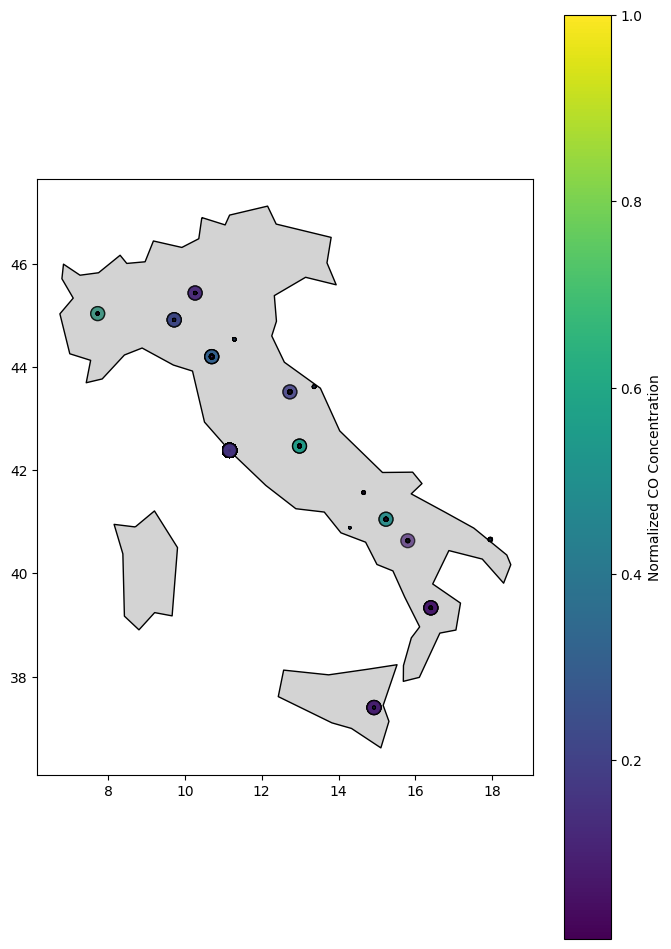

In [20]:
gdf = gpd.GeoDataFrame(
    df,
    geometry=gpd.points_from_xy(df.LONGITUDE, df.LATITUDE)
)

# Calculate wind speed if 'Wind_X' and 'Wind_Y' are vector components
gdf['Wind_Speed'] = np.sqrt(df['Wind_X']**2 + df['Wind_Y']**2)

# Normalize data for plotting
max_concentration = gdf['CO(GT)'].max()
max_wind_speed = gdf['Wind_Speed'].max()
max_elevation = gdf['ELEVATION'].max()

# Plotting
fig, ax = plt.subplots(figsize=(8, 12))
italy_map = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
italy = italy_map[(italy_map.name == "Italy")]
italy.plot(ax=ax, color='lightgray', edgecolor='black')

# Plot points with customized style
scatter = ax.scatter(gdf['LONGITUDE'], gdf['LATITUDE'], 
                     s=100 * (gdf['Wind_Speed'] / max_wind_speed),  # Size based on wind speed
                     c=gdf['CO(GT)'] / max_concentration,  # Color based on CO concentration
                     cmap='viridis',  # Color map
                     alpha=0.5 + 0.5 * (gdf['ELEVATION'] / max_elevation),  # Transparency based on elevation
                     edgecolor='black')

# Adding a color bar
cbar = plt.colorbar(scatter, ax=ax, orientation='vertical')
cbar.set_label('Normalized CO Concentration')

plt.show()

In [21]:
!pip install -U folium

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.0/100.0 kB 2.3 MB/s eta 0:00:0031m7.9 MB/s eta 0:00:01


In [22]:
import folium
from folium.plugins import MarkerCluster

# Create a map centered around Italy
m = folium.Map(location=[41.8719, 12.5674], zoom_start=6)

# Create a MarkerCluster object for efficient rendering of many markers
marker_cluster = MarkerCluster().add_to(m)

# Iterate through each row in the GeoDataFrame
for idx, row in gdf.iterrows():
    # Create a marker for each point
    folium.Marker(
        location=[row['LATITUDE'], row['LONGITUDE']], 
        popup=f"CO Concentration: {row['CO(GT)']}, Wind Speed: {row['Wind_Speed']}",
        icon=folium.Icon(color='blue')
    ).add_to(marker_cluster)

# Save the map to an HTML file
m.save('map.html')


In [26]:
import folium
from folium.plugins import HeatMap

# Create a map centered around Italy
m = folium.Map(location=[41.8719, 12.5674], zoom_start=6)

# Extract the latitude, longitude, and CO concentration columns from your dataset
locations = df[['LATITUDE', 'LONGITUDE', 'CO(GT)']]

# Create a HeatMap layer with CO concentration as weights
heat_map = HeatMap(locations, radius=15, blur=10)

# Add the HeatMap layer to the map
m.add_child(heat_map)

# Save the map to an HTML file
m.save('heatmap.html')


In [27]:
import folium
from folium.plugins import HeatMap

# Create a map centered around Italy
m = folium.Map(location=[41.8719, 12.5674], zoom_start=6)

# Calculate the wind direction from Wind_X and Wind_Y
df['Wind_Direction'] = np.degrees(np.arctan2(df['Wind_Y'], df['Wind_X']))

# Calculate the wind speed
df['Wind_Speed'] = np.sqrt(df['Wind_X']**2 + df['Wind_Y']**2)

# Extract the latitude, longitude, wind speed, and wind direction columns from your dataset
locations = df[['LATITUDE', 'LONGITUDE','CO(GT)', 'Wind_Speed', 'Wind_Direction']]

# Create a HeatMap layer with wind speed as weights
heat_map = HeatMap(locations, radius=15, blur=10)

# Add the HeatMap layer to the map
m.add_child(heat_map)

# Save the map to an HTML file
m.save('wind_map.html')


In [6]:
loss_data = {
    1: {"Training Loss": 2.7123, "Validation Loss": 2.2515},
    2: {"Training Loss": 2.2265, "Validation Loss": 2.1983},
    3: {"Training Loss": 2.1570, "Validation Loss": 2.0941},
    4: {"Training Loss": 2.0432, "Validation Loss": 2.0351},
    5: {"Training Loss": 1.9870, "Validation Loss": 1.9979},
    6: {"Training Loss": 1.9590, "Validation Loss": 1.9490},
    7: {"Training Loss": 1.9369, "Validation Loss": 1.9376},
    8: {"Training Loss": 1.9192, "Validation Loss": 1.9258},
    9: {"Training Loss": 1.9070, "Validation Loss": 1.9057},
    10: {"Training Loss": 1.8986, "Validation Loss": 1.9048},
    11: {"Training Loss": 1.8914, "Validation Loss": 1.9026},
    12: {"Training Loss": 1.8879, "Validation Loss": 1.8943},
    13: {"Training Loss": 1.8846, "Validation Loss": 1.8955},
    14: {"Training Loss": 1.8819, "Validation Loss": 1.9094},
    15: {"Training Loss": 1.8791, "Validation Loss": 1.8906},
    16: {"Training Loss": 1.8764, "Validation Loss": 1.8845},
    17: {"Training Loss": 1.8753, "Validation Loss": 1.8873},
    18: {"Training Loss": 1.8728, "Validation Loss": 1.8883},
    19: {"Training Loss": 1.8714, "Validation Loss": 1.8961},
    20: {"Training Loss": 1.8696, "Validation Loss": 1.8835},
    21: {"Training Loss": 1.8681, "Validation Loss": 1.8795},
    22: {"Training Loss": 1.8664, "Validation Loss": 1.8842},
    23: {"Training Loss": 1.8645, "Validation Loss": 1.8995},
    24: {"Training Loss": 1.8630, "Validation Loss": 1.8861},
    25: {"Training Loss": 1.8619, "Validation Loss": 1.8765},
    26: {"Training Loss": 1.8613, "Validation Loss": 1.8882},
    27: {"Training Loss": 1.8606, "Validation Loss": 1.8797},
    28: {"Training Loss": 1.8571, "Validation Loss": 1.8776},
    29: {"Training Loss": 1.8573, "Validation Loss": 1.8732},
    30: {"Training Loss": 1.8551, "Validation Loss": 1.8725},
    31: {"Training Loss": 1.8566, "Validation Loss": 1.8750},
    32: {"Training Loss": 1.8539, "Validation Loss": 1.8729},
    33: {"Training Loss": 1.8540, "Validation Loss": 1.8720},
    34: {"Training Loss": 1.8540, "Validation Loss": 1.8744},
    35: {"Training Loss": 1.8514, "Validation Loss": 1.8741},
    36: {"Training Loss": 1.8527, "Validation Loss": 1.8755},
    37: {"Training Loss": 1.8519, "Validation Loss": 1.8746},
    38: {"Training Loss": 1.8507, "Validation Loss": 1.8687},
    39: {"Training Loss": 1.8484, "Validation Loss": 1.8709},
    40: {"Training Loss": 1.8484, "Validation Loss": 1.8798},
    41: {"Training Loss": 1.8471, "Validation Loss": 1.8763},
    42: {"Training Loss": 1.8468, "Validation Loss": 1.8660},
    43: {"Training Loss": 1.8470, "Validation Loss": 1.8702},
    44: {"Training Loss": 1.8469, "Validation Loss": 1.8644},
    45: {"Training Loss": 1.8454, "Validation Loss": 1.8671},
    46: {"Training Loss": 1.8454, "Validation Loss": 1.8641},
    47: {"Training Loss": 1.8442, "Validation Loss": 1.8861},
    48: {"Training Loss": 1.8428, "Validation Loss": 1.8731},
    49: {"Training Loss": 1.8429, "Validation Loss": 1.8745},
    50: {"Training Loss": 1.8426, "Validation Loss": 1.8618},
    51: {"Training Loss": 1.8433, "Validation Loss": 1.8718},
    52: {"Training Loss": 1.8400, "Validation Loss": 1.8700},
    53: {"Training Loss": 1.8393, "Validation Loss": 1.8572},
    54: {"Training Loss": 1.8380, "Validation Loss": 1.8596},
    55: {"Training Loss": 1.8367, "Validation Loss": 1.8588},
    56: {"Training Loss": 1.8371, "Validation Loss": 1.8586},
    57: {"Training Loss": 1.8353, "Validation Loss": 1.8707},
    58: {"Training Loss": 1.8337, "Validation Loss": 1.8515},
    59: {"Training Loss": 1.8326, "Validation Loss": 1.8634},
    60: {"Training Loss": 1.8327, "Validation Loss": 1.8650},
    61: {"Training Loss": 1.8320, "Validation Loss": 1.8579},
    62: {"Training Loss": 1.8303, "Validation Loss": 1.8549},
    63: {"Training Loss": 1.8293, "Validation Loss": 1.8570},
    64: {"Training Loss": 1.8255, "Validation Loss": 1.8559},
    65: {"Training Loss": 1.8260, "Validation Loss": 1.8531},
    66: {"Training Loss": 1.8257, "Validation Loss": 1.8550},
    67: {"Training Loss": 1.8243, "Validation Loss": 1.8746},
    68: {"Training Loss": 1.8240, "Validation Loss": 1.8498},
    69: {"Training Loss": 1.8222, "Validation Loss": 1.8451},
    70: {"Training Loss": 1.8228, "Validation Loss": 1.8501},
    71: {"Training Loss": 1.8214, "Validation Loss": 1.8574},
    72: {"Training Loss": 1.8214, "Validation Loss": 1.8482},
    73: {"Training Loss": 1.8223, "Validation Loss": 1.8505},
    74: {"Training Loss": 1.8180, "Validation Loss": 1.8563},
    75: {"Training Loss": 1.8200, "Validation Loss": 1.8472},
    76: {"Training Loss": 1.8191, "Validation Loss": 1.8521},
    77: {"Training Loss": 1.8193, "Validation Loss": 1.8427},
    78: {"Training Loss": 1.8182, "Validation Loss": 1.8451},
    79: {"Training Loss": 1.8177, "Validation Loss": 1.8495},
    80: {"Training Loss": 1.8169, "Validation Loss": 1.8376},
    81: {"Training Loss": 1.8164, "Validation Loss": 1.8447},
    82: {"Training Loss": 1.8162, "Validation Loss": 1.8398},
    83: {"Training Loss": 1.8148, "Validation Loss": 1.8405},
    84: {"Training Loss": 1.8150, "Validation Loss": 1.8439},
    85: {"Training Loss": 1.8151, "Validation Loss": 1.8438},
    86: {"Training Loss": 1.8145, "Validation Loss": 1.8570},
    87: {"Training Loss": 1.8136, "Validation Loss": 1.8479},
    88: {"Training Loss": 1.8151, "Validation Loss": 1.8372},
    89: {"Training Loss": 1.8144, "Validation Loss": 1.8348},
    90: {"Training Loss": 1.8134, "Validation Loss": 1.8397},
    91: {"Training Loss": 1.8138, "Validation Loss": 1.8351},
    92: {"Training Loss": 1.8123, "Validation Loss": 1.8434},
    93: {"Training Loss": 1.8118, "Validation Loss": 1.8393},
    94: {"Training Loss": 1.8123, "Validation Loss": 1.8433},
    95: {"Training Loss": 1.8139, "Validation Loss": 1.8375},
    96: {"Training Loss": 1.8129, "Validation Loss": 1.8443},
    97: {"Training Loss": 1.8125, "Validation Loss": 1.8379},
    98: {"Training Loss": 1.8107, "Validation Loss": 1.8410},
    99: {"Training Loss": 1.8098, "Validation Loss": 1.8398},
    100: {"Training Loss": 1.8126, "Validation Loss": 1.8323},
}


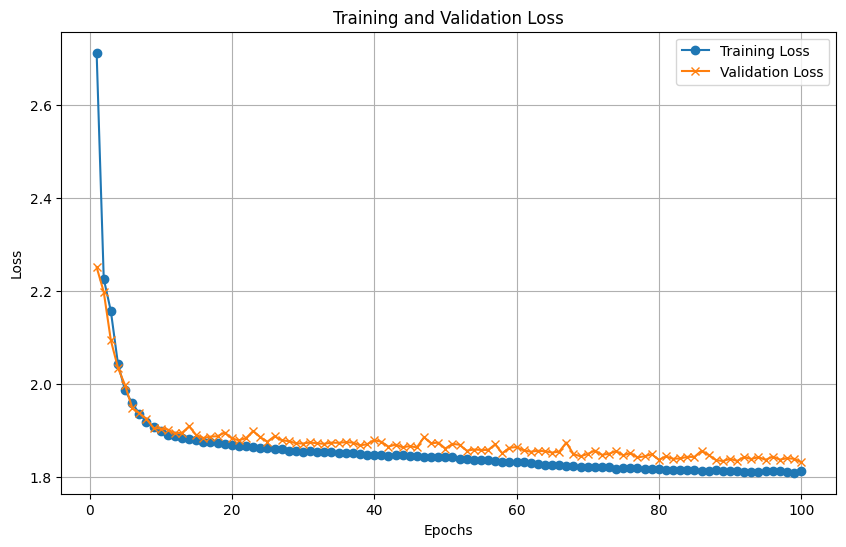

In [7]:
import matplotlib.pyplot as plt

# Extracting training and validation losses
epochs = list(loss_data.keys())
train_losses = [loss_data[epoch]["Training Loss"] for epoch in epochs]
val_losses = [loss_data[epoch]["Validation Loss"] for epoch in epochs]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_losses, label='Training Loss', marker='o')
plt.plot(epochs, val_losses, label='Validation Loss', marker='x')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


In [9]:
loss_data_no_pinn_clstm = {
    1: 1.6099090576171875,
    2: 1.257112741470337,
    3: 0.9044079780578613,
    4: 2.4148621559143066,
    5: 3.0972847938537598,
    6: 0.45506352186203003,
    7: 1.4680659770965576,
    8: 0.4117463231086731,
    9: 1.1856205463409424,
    10: 1.5054242610931396,
    11: 1.0881094932556152,
    12: 2.777113676071167,
    13: 3.460338592529297,
    14: 1.2981560230255127,
    15: 0.7429734468460083,
    16: 1.4728413820266724,
    17: 2.8851239681243896,
    18: 3.0251007080078125,
    19: 1.1782559156417847,
    20: 2.8255152702331543,
    21: 0.379951536655426,
    22: 1.266736626625061,
    23: 2.6035497188568115,
    24: 1.8513011932373047,
    25: 2.342576265335083,
    26: 2.0658137798309326,
    27: 0.6463385820388794,
    28: 1.224853277206421,
    29: 3.414745807647705,
    30: 2.6662678718566895,
    31: 3.717439651489258,
    32: 0.4440624713897705,
    33: 1.5555408000946045,
    34: 0.970234215259552,
    35: 2.0056447982788086,
    36: 1.9558079242706299,
    37: 0.785244345664978,
    38: 1.0984464883804321,
    39: 1.0913368463516235,
    40: 4.08634090423584,
    41: 1.0249781608581543,
    42: 0.7938399314880371,
    43: 1.826385498046875,
    44: 0.9180127382278442,
    45: 1.961021065711975,
    46: 1.2727946043014526,
    47: 11.105520248413086,
    48: 0.48778218030929565,
    49: 1.1373140811920166,
    50: 1.7794510126113892,
    51: 3.2855026721954346,
    52: 1.9589996337890625,
    53: 1.2616102695465088,
    54: 0.6642407178878784,
    55: 1.437238097190857,
    56: 1.5817718505859375,
    57: 0.7858369946479797,
    58: 1.8578927516937256,
    59: 0.7492043375968933,
    60: 3.430985689163208,
    61: 4.27735710144043,
    62: 1.557723045349121,
    63: 1.382918119430542,
    64: 0.6828629374504089,
    65: 1.6350666284561157,
    66: 3.168449878692627,
    67: 2.131528377532959,
    68: 2.804495334625244,
    69: 2.043827772140503,
    70: 1.3320022821426392,
    71: 1.9759035110473633,
    72: 5.33847713470459,
    73: 2.105109214782715,
    74: 2.88961124420166,
    75: 0.8491244316101074,
    76: 1.8843114376068115,
    77: 3.887500286102295,
    78: 1.2581546306610107,
    79: 0.8458471298217773,
    80: 1.9239683151245117,
    81: 0.6001275777816772,
    82: 1.8930997848510742,
    83: 0.4985063970088959,
    84: 0.6554994583129883,
    85: 1.7227567434310913,
    86: 1.9520599842071533,
    87: 0.7320879101753235,
    88: 3.2278754711151123,
    89: 1.541148066520691,
    90: 1.0821489095687866,
    91: 1.283182978630066,
    92: 1.1676946878433228,
    93: 0.9866751432418823,
    94: 0.43215736746788025,
    95: 0.7219420671463013,
    96: 1.8907463550567627,
    97: 0.5289681553840637,
    98: 2.187293767929077,
    99: 0.7879172563552856,
    100: 1.5183899402618408
}


In [10]:
loss_data_pinn_clstm = {
    1: 2.574839747334774,
    2: 2.1666879195378876,
    3: 2.106010552464711,
    4: 2.0754038869413267,
    5: 2.0448867845195084,
    6: 2.0026811903495427,
    7: 1.960355975398269,
    8: 1.940213979495408,
    9: 1.9311296046843285,
    10: 1.922577013016881,
    11: 1.9193049964099662,
    12: 1.9147731939620836,
    13: 1.909169610913103,
    14: 1.9035530497854871,
    15: 1.9059478321625418,
    16: 1.89503779068288,
    17: 1.894484035892237,
    18: 1.8908394160508826,
    19: 1.8901817743333142,
    20: 1.8872309520610306,
    21: 1.8846792804783787,
    22: 1.8828933501215241,
    23: 1.8844071625954473,
    24: 1.8797082590574883,
    25: 1.8793245417893145,
    26: 1.8778819803959124,
    27: 1.8759295491769679,
    28: 1.8739982893010523,
    29: 1.8736457808406117,
    30: 1.8730366796999285,
    31: 1.8685703134777714,
    32: 1.8683826722089516,
    33: 1.8705286982510234,
    34: 1.8672532016116856,
    35: 1.863990966119891,
    36: 1.8626987450755026,
    37: 1.8609965776008035,
    38: 1.8622068302101245,
    39: 1.8597549395668946,
    40: 1.8630645484901638,
    41: 1.8564867273805825,
    42: 1.858530835220845,
    43: 1.8541617203552572,
    44: 1.8540553023925719,
    45: 1.8545275928007436,
    46: 1.855218907457186,
    47: 1.8553357947879114,
    48: 1.851726672241152,
    49: 1.8602191782451272,
    50: 1.8567886312849882,
    51: 1.8508848379965204,
    52: 1.849628152801931,
    53: 1.8533006912888017,
    54: 1.8470136068238656,
    55: 1.8500787882969296,
    56: 1.8467755406279909,
    57: 1.8481372105805967,
    58: 1.8449379867662572,
    59: 1.8452025011943722,
    60: 1.8465464697014562,
    61: 1.8465268655140816,
    62: 1.8429657257694694,
    63: 1.8406722819904369,
    64: 1.8397405436007788,
    65: 1.8398214727462967,
    66: 1.843990919989723,
    67: 1.8376095263768035,
    68: 1.8452410498782372,
    69: 1.840287929199255,
    70: 1.8359926693788182,
    71: 1.8348931412209228,
    72: 1.8378971593983817,
    73: 1.8373150736908568,
    74: 1.838001128113369,
    75: 1.8338577572287333,
    76: 1.8333672037022577,
    77: 1.8393922012994746,
    78: 1.8424628131738316,
    79: 1.8310083809987543,
    80: 1.834224930203627,
    81: 1.8311489564626877,
    82: 1.8340587344521149,
    83: 1.83256461319827,
    84: 1.829471591749316,
    85: 1.8345993949315211,
    86: 1.8282698429013546,
    87: 1.8282734984875293,
    88: 1.828413886136589,
    89: 1.8285162365252283,
    90: 1.8275193610316083,
    91: 1.8266320986214772,
    92: 1.8274368970487687,
    93: 1.8285823611810572,
    94: 1.82672983322926,
    95: 1.8251677674288982,
    96: 1.8261542571143787,
    97: 1.824769336672657,
    98: 1.8300118131671592,
    99: 1.824331179881351,
    100: 1.8258063613163589
}


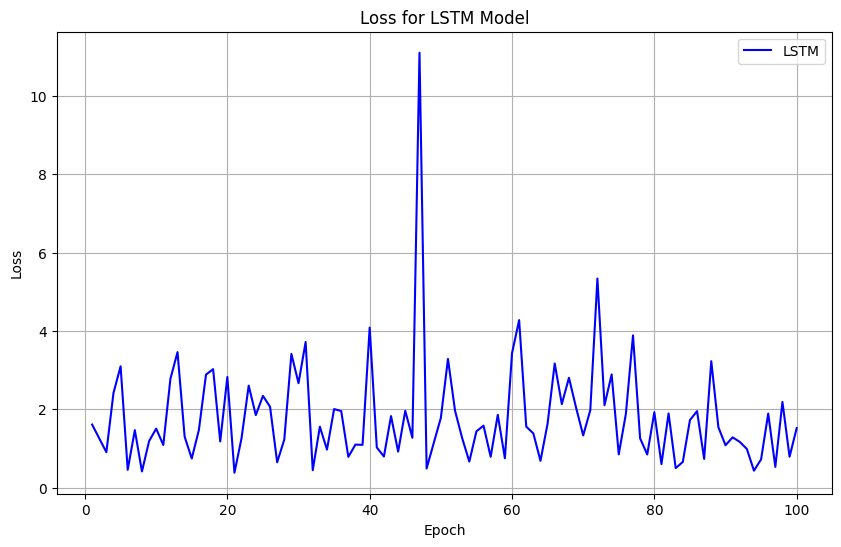

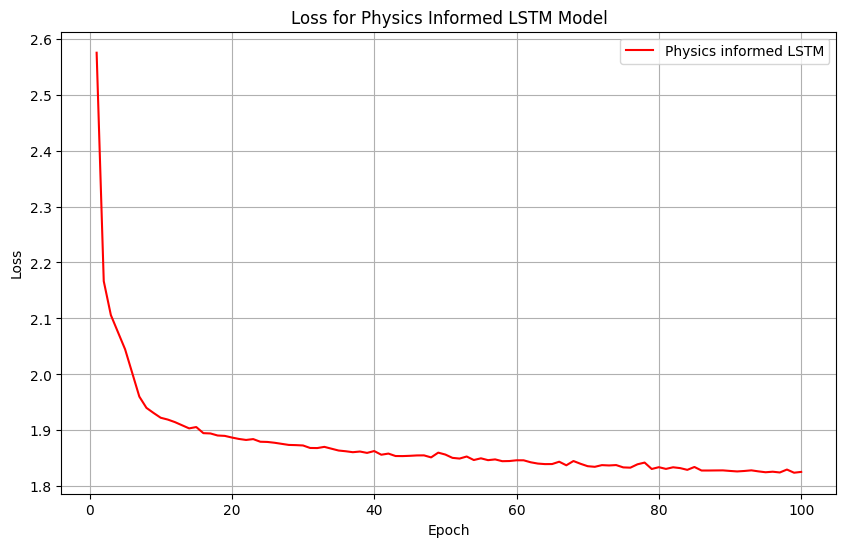

In [13]:
import matplotlib.pyplot as plt

# Extract x and y values from dictionaries
epochs_1, losses_1 = zip(*loss_data_no_pinn_clstm.items())
epochs_2, losses_2 = zip(*loss_data_pinn_clstm.items())

# Plotting the first dictionary
plt.figure(figsize=(10, 6))
plt.plot(epochs_1, losses_1, label='LSTM', color='blue')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss for LSTM Model')
plt.legend()
plt.grid(True)
plt.show()

# Plotting the second dictionary
plt.figure(figsize=(10, 6))
plt.plot(epochs_2, losses_2, label='Physics informed LSTM', color='red')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss for Physics Informed LSTM Model')
plt.legend()
plt.grid(True)
plt.show()


In [15]:
import pandas as pd